This notebook contains scratch code and ideas of things i worked on while I developed this code. 

In [ ]:
import sys
import os
sys.path.append('..')
from project import *
import time
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2

In [2]:
tracker = VehicleTracker()

/Users/wolfgangblack/Documents/projects/multi-track/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/wolfgangblack/Documents/projects/multi-track/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



0: 288x640 1 car, 224.7ms
Speed: 75.0ms preprocess, 224.7ms inference, 221.2ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 12.5ms
Speed: 1.3ms preprocess, 12.5ms inference, 5.7ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 8.6ms
Speed: 0.7ms preprocess, 8.6ms inference, 5.2ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 8.7ms
Speed: 0.7ms preprocess, 8.7ms inference, 5.5ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 8.9ms
Speed: 0.7ms preprocess, 8.9ms inference, 29.4ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 9.3ms
Speed: 0.7ms preprocess, 9.3ms inference, 5.2ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 8.3ms
Speed: 0.7ms preprocess, 8.3ms inference, 29.2ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 8.9ms
Speed: 0.6ms preprocess, 8.9ms inference, 4.9ms postprocess per image at shape (1, 3, 288, 640)

0: 288x640 1 car, 8.

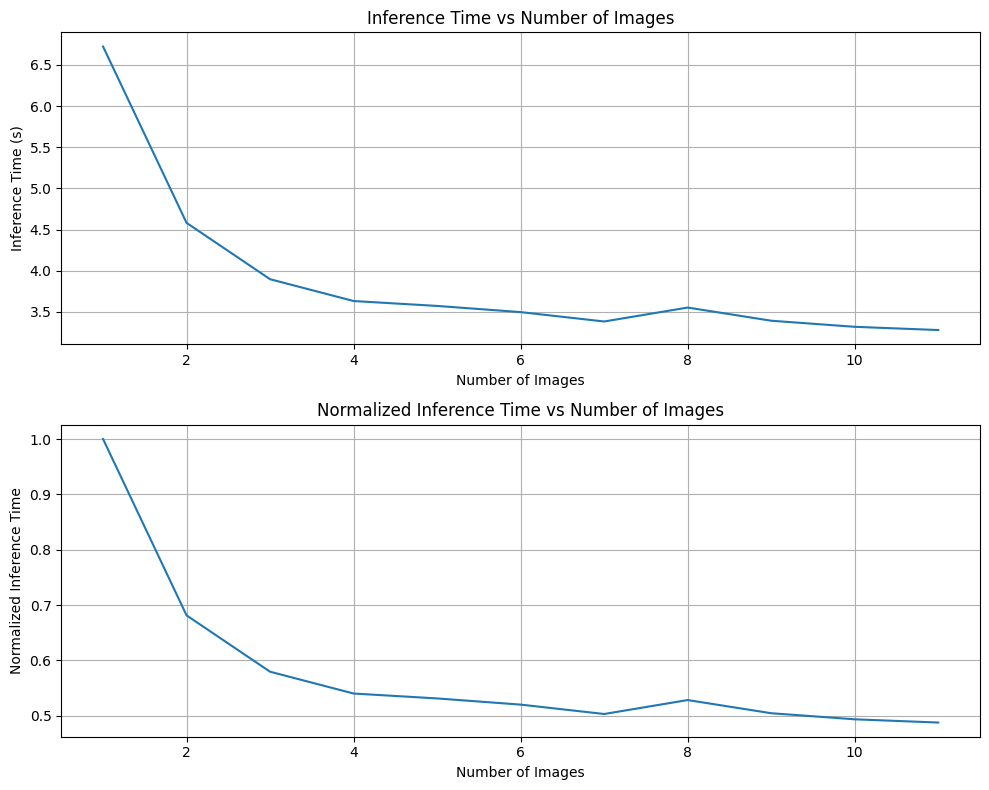

In [3]:
batch_time = {}
for i in range(1, 12):
    start = time.time()
    tracker.batch_size = i
    tracker('../data/provided_frames', '../data/batch_test',False, False)
    batch_time[i] = time.time() - start

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(batch_time.keys(), batch_time.values())
axs[0].set_title('Inference Time vs Number of Images')
axs[0].set_xlabel('Number of Images')
axs[0].set_ylabel('Inference Time (s)')
axs[0].grid()
axs[1].plot(batch_time.keys(), [t / list(batch_time.values())[0] for t in batch_time.values()])
axs[1].set_title('Normalized Inference Time vs Number of Images')
axs[1].set_xlabel('Number of Images')
axs[1].set_ylabel('Normalized Inference Time')
axs[1].grid()

plt.tight_layout()
plt.show()

In [48]:
datadir = '../data/provided_frames/'
image_paths = [os.path.join(datadir,i) for i in sorted(
    os.listdir(datadir)
    ) if i.endswith(".jpg")]

In [ ]:
[cv2.imread(i) for i in image_paths[:5]]

In [ ]:
yolo_model = YOLO("yolo11s.pt")

In [ ]:
times = {}
for i in range(1,11):
    start_time = time.time()
    yolo_model(image_paths[:i])
    times[i] = time.time()-start_time

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].plot(times.keys(), times.values())
axs[0].set_title('Inference Time vs Number of Images')
axs[0].set_xlabel('Number of Images')
axs[0].set_ylabel('Inference Time (s)')
axs[0].grid()
axs[1].plot(times.keys(), [t / list(times.values())[0] for t in times.values()])
axs[1].set_title('Normalized Inference Time vs Number of Images')
axs[1].set_xlabel('Number of Images')
axs[1].set_ylabel('Normalized Inference Time')
axs[1].grid()

plt.tight_layout()
plt.show()

In [ ]:
bbox = yolo_model(image_paths[0])
bbox[0].boxes.xyxy[0]

In [ ]:
bbox[0].boxes.xyxy[0]

In [ ]:
tracker.extract_features(image_paths[0], bbox[0].boxes.xyxy[0].c)

In [ ]:
savedir = './results/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

for image_name in sorted(os.listdir('../data/frames/')):
    if image_name.endswith('.jpg'):
        image = cv2.imread('../data/frames/' + image_name)
        results = yolo_model(image, classes = list(yolo_classes.keys()))
        break

In [ ]:
for result in results:
    print(result.boxes.data)

In [ ]:
savedir = './results/'
if not os.path.exists(savedir):
    os.makedirs(savedir)

for image_name in sorted(os.listdir('../data/frames/')):
    if image_name.endswith('.jpg'):
        image = cv2.imread('../data/frames/' + image_name)
        results = yolo_model(image, classes = list(yolo_classes.keys()))

        for idx, result in enumerate(results):
            var = result.boxes.data
            cls = int(var[0][-1])
            x1, x2, x3, x4 = var[0][:4]
            conf = var[0][-2]
            result.show()  # display to screen
            save_path = os.path.join(savedir, f"{image_name.split('.')[0]}_det_{idx}_cls_{cls}.jpg")
            result.save(save_path)  # save to disk

In [ ]:
tracker(yolo_model, '../data/frames/','data/script_test/',True)


In [ ]:
os.listdir('../data/')

In [12]:
line.split('\n')[0].split(',')[:-2]

['0', '5', '167', '48', '192']

In [6]:
with open('../data/groundtruth.txt', 'r') as f:
    lines = f.readlines()
groundtruth = []
for line in lines:
    line = [float(i) for i in line.split('\n')[0].split(',')]
    groundtruth.append([line[0], line[5], line[4], line[1]])

predictions = []
#check what yolo do (what is y1, y2, etc)
#then check our overlap and size
with open('../data/single_car_results/bbox.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = [float(i) for i in line.split('\n')[0].split(',')[:-2]]
        predictions.append([line[1], line[2], line[3], line[4]])

print(groundtruth[0], predictions[0])


[6.0, 166.0, 49.0, 193.0] [5.0, 167.0, 48.0, 192.0]


In [18]:
def calculate_iou(box1, box2):
    # Determine the coordinates of the intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    # Calculate the area of intersection rectangle
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    # Calculate the area of both bounding boxes
    box1_area = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    box2_area = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    # Calculate the IoU
    iou = intersection_area / float(box1_area + box2_area - intersection_area)

    return iou

iou = calculate_iou(groundtruth[0], predictions[0])

print(f"IoU: {iou}")

IoU: 0.8887122416534181
